In [2]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import pyproj as proj
from numpy import ma

In [29]:
fl = './geo_em.d01_crop.nc'
fl2 = './annual/wrf2d_d01_2001_thinned_crop.nc'

In [30]:
sphere = proj.Proj(proj='longlat',a=6370000,b=6370000) # WRF spherical lat lons
lccCONUS = proj.Proj(proj='lcc',lat_1=28,lat_2=50,lat_0=39.700012207,lon_0=-98,
               x_0=0,y_0=0,a=6370000, b=6370000,units='m') # WRF hydro LCC projection CONUS
wgs84 = proj.Proj(proj='longlat',ellps='WGS84',datum='WGS84') # doms box projection
lccHeadwaters = proj.Proj(proj='lcc',lat_1=28,lat_2=50,lat_0=38.373,lon_0=-108.5,
               x_0=0,y_0=0,a=6370000, b=6370000,units='m')

In [31]:
# Open netCDF input
#fl = './geo_em.d01_crop.nc'
geo = Dataset(fl,'r','NETCDF') # open the cropped geogrid netCDFs

In [32]:
# extract lats and longs from the geogrid
XLATS = geo['XLAT_M'][0]
XLONGS = geo['XLONG_M'][0]

In [33]:
X,Y = proj.transform(sphere,lccCONUS,XLONGS,XLATS) # project lat longs to WRF LCC
#fl = './annual/wrf2d_d01_2001_thinned_crop.nc'
wrf01 = Dataset(fl2,'r','NETCDF') # open cropped data set

(-1400000.0, -400000.0, -800000.0, 600000.0)

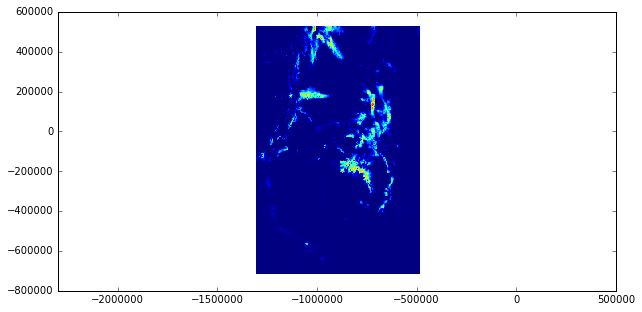

In [35]:
# plot the data using the WRF LCC projected lats and longs
plt.figure(figsize=(10,5))
plt.pcolormesh(X,Y,wrf01['SNOW'][0])
plt.axis('equal')

In [47]:
X3,Y3 = proj.transform(lccCONUS,lccHeadwaters,X,Y)

In [48]:
# We assume Basemap projects WGS84 lat longs so convert WRF spherical lat longs to WGS84
XLONGS3,XLATS3 = proj.transform(lccHeadwaters,wgs84,X3,Y3)

In [49]:
map = Basemap(width=3000000,height=1500000,rsphere=(6370000,6370000),projection='lcc', lat_1=28,lat_2=50,lat_0=38.375,lon_0=-108) # make a Basemap projection with 

In [50]:
X2,Y2 = map(XLONGS3,XLATS3) # project the WGS84 coordinates to to LCC

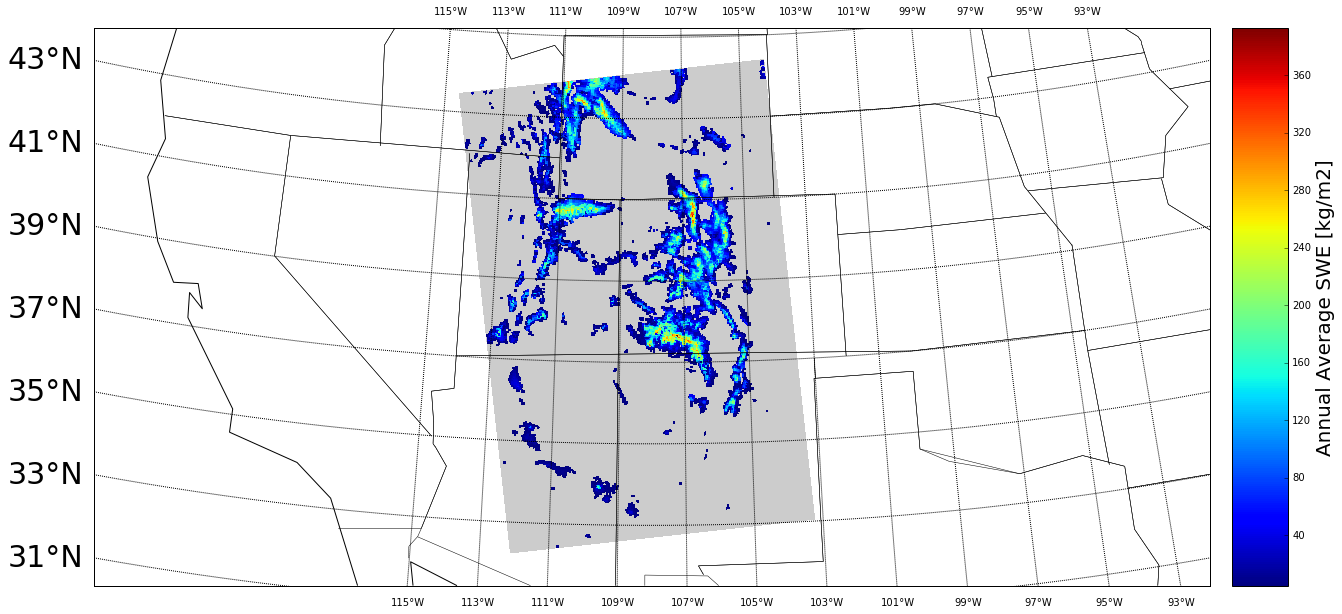

In [51]:
# Plot
plt.figure(figsize = (40,10))
snow = wrf01['SNOW'][0]
snow = wrf01['SNOW'][:]
snow = snow.sum(axis=0)
snow[snow<=5] = -9999
snow2 = ma.masked_values(snow,-9999)
map.pcolormesh(X2,Y2,snow2, edgecolor='0.8')
map.pcolormesh(X2,Y2,snow2)
cb = map.colorbar()
cb.set_label('Annual Average SWE [kg/m2]', fontsize=20)
map.drawmeridians(np.arange(-115,-91,2),labels=np.arange(-115,-91,5), fontsize=10);
map.drawparallels(np.arange(31.,47.,2.), labels=[1,0,0,0,0,0,0], fontsize=30,);
map.drawstates();
map.drawcountries();
map.drawcoastlines();

In [27]:
# plot the uprojected WGS84 data
plt.figure(figsize=(10,10));
plt.pcolormesh(X3,XLATS3,snow2, edgecolor='0.8');
plt.pcolormesh(XLONGS3,XLATS3,snow2);

NameError: name 'X3' is not defined